In [1]:
import tensorflow as tf
from tensorflow.keras import datasets ,layers,models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()


In [3]:
print('Training data shape:', train_images.shape)
print('Teting data shape:',test_images.shape)
print('Labels range:',np.unique(train_labels))

Training data shape: (60000, 28, 28)
Teting data shape: (10000, 28, 28)
Labels range: [0 1 2 3 4 5 6 7 8 9]


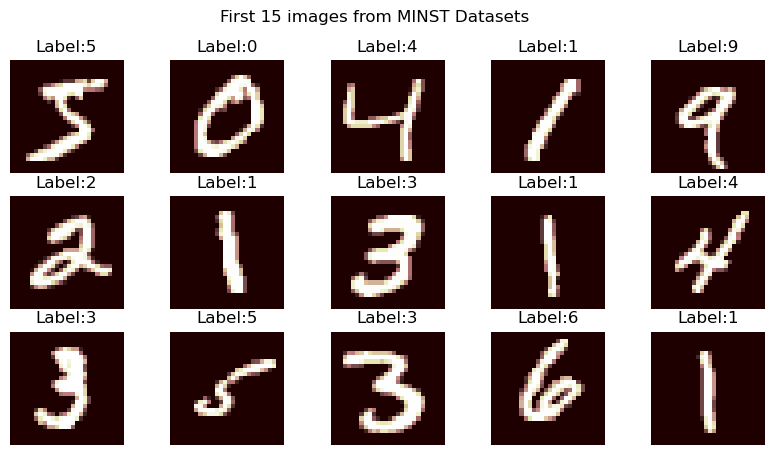

In [17]:
plt.figure(figsize=(10,5))
for i in range(15):
    plt.subplot(3,5,i +1)
    plt.imshow(train_images[i],cmap='pink')
    plt.title(f'Label:{train_labels[i]}')
    plt.axis('off')
plt.suptitle('First 15 images from MINST Datasets')
plt.show()

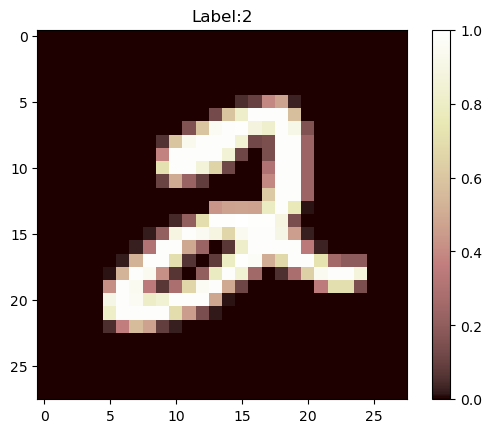

In [15]:
index=5
plt.imshow(train_images[index],cmap='pink')
plt.title(f'Label:{train_labels[index]}')
plt.colorbar()
plt.show()


In [6]:
print(f'\nPixel values of images at index{index}:')
print(train_images[index])


Pixel values of images at index5:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  13  25 100
  122   7   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  33 151 208 252 252
  252 146   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  40 152 244 252 253 224 211
  252 232  40   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0

In [7]:
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))


In [8]:

# Normalize pixel values (0–255 → 0–1)
train_images, test_images = train_images / 255.0, test_images / 255.0

print("\nAfter normalization:")
print("Pixel value range:", train_images.min(), "to", train_images.max())


After normalization:
Pixel value range: 0.0 to 1.0


In [9]:
# ================================================
# 6️⃣ Build a Simple CNN (No Pooling or Padding)
# ================================================
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 classes for digits 0–9
])

model.summary()

C:\Users\Dell\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 24, 24, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 36864)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │       2,359,360 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,378,826 (9.07 MB)

 Trainable params: 2,378,826 (9.07 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=5,
                    validation_data=(test_images, test_labels))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 134s 70ms/step - accuracy: 0.9654 - loss: 0.1142 - val_accuracy: 0.9813 - val_loss: 0.0548
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 140s 69ms/step - accuracy: 0.9875 - loss: 0.0391 - val_accuracy: 0.9874 - val_loss: 0.0367
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 143s 69ms/step - accuracy: 0.9923 - loss: 0.0227 - val_accuracy: 0.9850 - val_loss: 0.0474
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 131s 70ms/step - accuracy: 0.9952 - loss: 0.0144 - val_accuracy: 0.9906 - val_loss: 0.0356
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 133s 71ms/step - accuracy: 0.9967 - loss: 0.0106 - val_accuracy: 0.9895 - val_loss: 0.0385


313/313 - 5s - 15ms/step - accuracy: 0.9895 - loss: 0.0385

Test accuracy: 0.9895


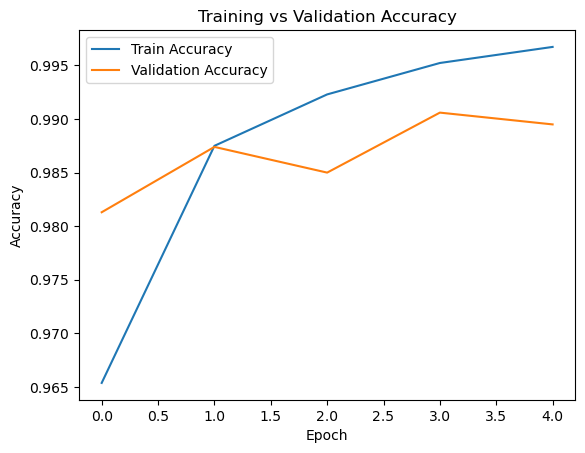

In [12]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f"\nTest accuracy: {test_acc:.4f}")

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title("Training vs Validation Accuracy")
plt.show()